# Analysese the natural groups in the data

I'm going to  run t-SNE vidualisation over session_data_full.csv

In [1]:
import pandas as pd
import os
from core.constants import RICKD_SESSION_DATA_FULL_FILE

session_data_full = pd.read_csv(RICKD_SESSION_DATA_FULL_FILE)
session_data_full

,id,sub_id,datestring,filename,speed_r,age,Height,Weight,Gender,DominantLeg,...,l_pronation_onset,r_pronation_onset,l_pronation_offset,r_pronation_offset,l_peak_hip_add_velocity,r_peak_hip_add_velocity,l_peak_pelvic_drop_velocity,r_peak_pelvic_drop_velocity,l_vertical_oscillation,r_vertical_oscillation
0,100433_20101005t132240,100433,2010-10-05 13:22:40,20101005t132240.json,1.610861,53,NaN,NaN,unknown,NaN,...,13.0,17.0,66.0,57.0,93.154907,59.323001,-61.317978,-75.058744,61.125564,51.466247
1,100434_20101117t132240,100434,2010-11-17 13:22:40,20101117t132240.json,2.237294,51,NaN,NaN,female,NaN,...,11.0,8.0,58.0,53.0,183.843653,183.573751,-99.163244,-96.178927,76.028357,62.307667
2,100537_20120703t102550,100537,2012-07-03 10:25:50,20120703t102550.json,2.127441,255,173.1,67.6,female,right,...,10.0,13.0,49.0,56.0,226.429356,257.430836,-62.309317,-62.804925,78.130812,81.753809
3,100560_20120717t103748,100560,2012-07-17 10:37:48,20120717t103748.json,2.657365,33,179.3,83.0,female,right,...,23.0,20.0,59.0,55.0,277.567734,320.445059,-128.814092,-141.687354,113.867318,111.686204
4,101481_20120717t105021,101481,2012-07-17 10:50:21,20120717t105021.json,2.625088,32,176.3,58.6,female,NaN,...,15.0,17.0,50.0,57.0,94.850522,169.271213,-37.007098,-49.506248,91.595199,99.045820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,200986_20150312t143944,200986,2015-03-12 14:39:44,20150312t143944.json,4.876998,20,174.0,56.8,female,right,...,13.0,26.0,76.0,55.0,83.982280,113.244646,-30.979746,-35.757575,89.724083,84.589713
1828,200987_20150312t160840,200987,2015-03-12 16:08:40,20150312t160840.json,2.765022,50,164.0,60.0,female,right,...,18.0,18.0,55.0,52.0,115.733290,171.902428,-74.064966,-70.457833,66.498443,68.524480
1829,201100_20150409t155915,201100,2015-04-09 15:59:15,20150409t155915.json,2.790966,52,170.0,80.0,male,right,...,7.0,19.0,30.0,68.0,281.312605,203.683223,-146.535658,-120.697186,74.753470,86.710600
1830,201101_20150413t143152,201101,2015-04-13 14:31:52,20150413t143152.json,2.828602,21,162.0,65.5,male,right,...,21.0,17.0,70.0,50.0,137.612824,168.473505,-56.000594,-79.974041,76.066245,67.343927


In [7]:
# Create is_injured variable based on SpecInjury and SpecInjury2 columns
session_data_full['is_injured'] = (
    session_data_full['SpecInjury'].notna() | 
    session_data_full['SpecInjury2'].notna()
).astype(int)

# Split the data into X (injury-related features) and y (remaining features)
injury_columns = ['InjDefn', 'InjJoint', 'InjSide', 'SpecInjury', 'InjJoint2', 'InjSide2', 'SpecInjury2', 'is_injured']

# Create X dataframe with injury-related features
Y = session_data_full[injury_columns].copy()

# Create y dataframe with all remaining features
X_columns = [col for col in session_data_full.columns if col not in injury_columns]
X = session_data_full[X_columns].copy()

print("X")
display(X.head())

print("Y")
display(Y.head())


X


,id,sub_id,datestring,filename,speed_r,age,Height,Weight,Gender,DominantLeg,...,l_pronation_onset,r_pronation_onset,l_pronation_offset,r_pronation_offset,l_peak_hip_add_velocity,r_peak_hip_add_velocity,l_peak_pelvic_drop_velocity,r_peak_pelvic_drop_velocity,l_vertical_oscillation,r_vertical_oscillation
0,100433_20101005t132240,100433,2010-10-05 13:22:40,20101005t132240.json,1.610861,53,NaN,NaN,unknown,NaN,...,13.0,17.0,66.0,57.0,93.154907,59.323001,-61.317978,-75.058744,61.125564,51.466247
1,100434_20101117t132240,100434,2010-11-17 13:22:40,20101117t132240.json,2.237294,51,NaN,NaN,female,NaN,...,11.0,8.0,58.0,53.0,183.843653,183.573751,-99.163244,-96.178927,76.028357,62.307667
2,100537_20120703t102550,100537,2012-07-03 10:25:50,20120703t102550.json,2.127441,255,173.1,67.6,female,right,...,10.0,13.0,49.0,56.0,226.429356,257.430836,-62.309317,-62.804925,78.130812,81.753809
3,100560_20120717t103748,100560,2012-07-17 10:37:48,20120717t103748.json,2.657365,33,179.3,83.0,female,right,...,23.0,20.0,59.0,55.0,277.567734,320.445059,-128.814092,-141.687354,113.867318,111.686204
4,101481_20120717t105021,101481,2012-07-17 10:50:21,20120717t105021.json,2.625088,32,176.3,58.6,female,NaN,...,15.0,17.0,50.0,57.0,94.850522,169.271213,-37.007098,-49.506248,91.595199,99.045820


Y


,InjDefn,InjJoint,InjSide,SpecInjury,InjJoint2,InjSide2,SpecInjury2,is_injured
0,training volume/intensity affected,knee,right,pain,no injury,right,NaN,1
1,training volume/intensity affected,lumbar spine,bilateral,disc degeneration,no injury,right,NaN,1
2,2 workouts missed in a row,hip/pelvis,right,other,no injury,right,NaN,1
3,no injury,no injury,right,NaN,no injury,right,NaN,0
4,no injury,"no injury,no injury",NaN,NaN,NaN,NaN,NaN,0


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Prepare the data for t-SNE
# Separate numerical and categorical columns
numerical_columns = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Remove non-feature columns
non_feature_columns = ['id', 'sub_id', "datestring", "filename", "sub_id_orig", "session_file_path",
                       "RaceDistance", 'YrsRunning', 'RaceTimeHrs', 'RaceTimeMins', 'RaceTimeSecs', 'YrPR', 'NumRaces', 'Activities',
                       ]
feature_numerical_columns = [col for col in numerical_columns if col not in non_feature_columns]
feature_categorical_columns = [col for col in categorical_columns if col not in non_feature_columns]



print("Categorical features:")
print(feature_categorical_columns)
print("Numerical features:")
print(feature_numerical_columns)


Categorical features:
['Gender', 'DominantLeg', 'Level']
Numerical features:
['speed_r', 'age', 'Height', 'Weight', 'InjDuration', 'l_step_width', 'r_step_width', 'l_stride_rate', 'r_stride_rate', 'l_stride_length', 'r_stride_length', 'l_swing_time', 'r_swing_time', 'l_stance_time', 'r_stance_time', 'l_pelvis_peak_drop_angle', 'r_pelvis_peak_drop_angle', 'l_pelvis_drop_percent_stance', 'r_pelvis_drop_percent_stance', 'l_pelvis_drop_at_hs', 'r_pelvis_drop_at_hs', 'l_pelvis_drop_excursion', 'r_pelvis_drop_excursion', 'l_ankle_df_peak_angle', 'r_ankle_df_peak_angle', 'l_ankle_df_percent_stance', 'r_ankle_df_percent_stance', 'l_ankle_df_at_hs', 'r_ankle_df_at_hs', 'l_ankle_df_excursion', 'r_ankle_df_excursion', 'l_ankle_eve_peak_angle', 'r_ankle_eve_peak_angle', 'l_ankle_eve_percent_stance', 'r_ankle_eve_percent_stance', 'l_ankle_eve_at_hs', 'r_ankle_eve_at_hs', 'l_ankle_eve_excursion', 'r_ankle_eve_excursion', 'l_ankle_rot_peak_angle', 'r_ankle_rot_peak_angle', 'l_ankle_rot_percent_stance

In [9]:
# Create one-hot encoded features for categorical columns
categorical_data = pd.get_dummies(X[feature_categorical_columns], drop_first=True)

# Combine numerical and one-hot encoded categorical features
X_numerical = X[feature_numerical_columns].fillna(0)
X_combined = pd.concat([X_numerical, categorical_data], axis=1)

print(f"Numerical features: {len(feature_numerical_columns)}")
print(f"Categorical features (after one-hot encoding): {categorical_data.shape[1]}")
print(f"Total features: {X_combined.shape[1]}")
# Display all columns of the dataframe
print("Columns:")
for i, col in enumerate(X_combined.columns, 1):
    print(f"{i:3d}. {col}")
display(X_combined)

Numerical features: 157
Categorical features (after one-hot encoding): 5
Total features: 162
Columns:
  1. speed_r
  2. age
  3. Height
  4. Weight
  5. InjDuration
  6. l_step_width
  7. r_step_width
  8. l_stride_rate
  9. r_stride_rate
 10. l_stride_length
 11. r_stride_length
 12. l_swing_time
 13. r_swing_time
 14. l_stance_time
 15. r_stance_time
 16. l_pelvis_peak_drop_angle
 17. r_pelvis_peak_drop_angle
 18. l_pelvis_drop_percent_stance
 19. r_pelvis_drop_percent_stance
 20. l_pelvis_drop_at_hs
 21. r_pelvis_drop_at_hs
 22. l_pelvis_drop_excursion
 23. r_pelvis_drop_excursion
 24. l_ankle_df_peak_angle
 25. r_ankle_df_peak_angle
 26. l_ankle_df_percent_stance
 27. r_ankle_df_percent_stance
 28. l_ankle_df_at_hs
 29. r_ankle_df_at_hs
 30. l_ankle_df_excursion
 31. r_ankle_df_excursion
 32. l_ankle_eve_peak_angle
 33. r_ankle_eve_peak_angle
 34. l_ankle_eve_percent_stance
 35. r_ankle_eve_percent_stance
 36. l_ankle_eve_at_hs
 37. r_ankle_eve_at_hs
 38. l_ankle_eve_excursion
 39.

,speed_r,age,Height,Weight,InjDuration,l_step_width,r_step_width,l_stride_rate,r_stride_rate,l_stride_length,...,r_peak_hip_add_velocity,l_peak_pelvic_drop_velocity,r_peak_pelvic_drop_velocity,l_vertical_oscillation,r_vertical_oscillation,Gender_male,Gender_unknown,DominantLeg_left,DominantLeg_right,Level_recreational
0,1.610861,53,0.0,0.0,21.0,0.048521,0.048521,83.333333,83.333333,1.159820,...,59.323001,-61.317978,-75.058744,61.125564,51.466247,False,True,False,False,True
1,2.237294,51,0.0,0.0,0.0,-0.002092,-0.002092,87.913267,87.591241,1.526953,...,183.573751,-99.163244,-96.178927,76.028357,62.307667,False,False,False,False,True
2,2.127441,255,173.1,67.6,0.0,0.057484,0.057484,80.000000,80.000000,1.595581,...,257.430836,-62.309317,-62.804925,78.130812,81.753809,False,False,False,True,True
3,2.657365,33,179.3,83.0,0.0,0.081206,0.081206,75.000000,75.000000,2.125892,...,320.445059,-128.814092,-141.687354,113.867318,111.686204,False,False,False,True,True
4,2.625088,32,176.3,58.6,0.0,0.062199,0.062199,79.470199,79.470199,1.981942,...,169.271213,-37.007098,-49.506248,91.595199,99.045820,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,4.876998,20,174.0,56.8,0.0,0.068630,0.068630,83.916084,84.507042,3.487054,...,113.244646,-30.979746,-35.757575,89.724083,84.589713,False,False,False,True,False
1828,2.765022,50,164.0,60.0,0.0,0.079469,0.079469,88.888889,88.235294,1.866390,...,171.902428,-74.064966,-70.457833,66.498443,68.524480,False,False,False,True,True
1829,2.790966,52,170.0,80.0,0.0,0.108809,0.108809,76.433121,76.433121,2.190908,...,203.683223,-146.535658,-120.697186,74.753470,86.710600,True,False,False,True,True
1830,2.828602,21,162.0,65.5,0.0,0.090986,0.090986,88.235294,88.235294,1.923449,...,168.473505,-56.000594,-79.974041,76.066245,67.343927,True,False,False,True,True


In [10]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

In [13]:
# Apply t-SNE
print("Running t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)
tsne.kl_divergence_

Running t-SNE...


/Users/adrianzapaterreig/Documents/Personal/TFM/rickd-analysis/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


2.002664089202881

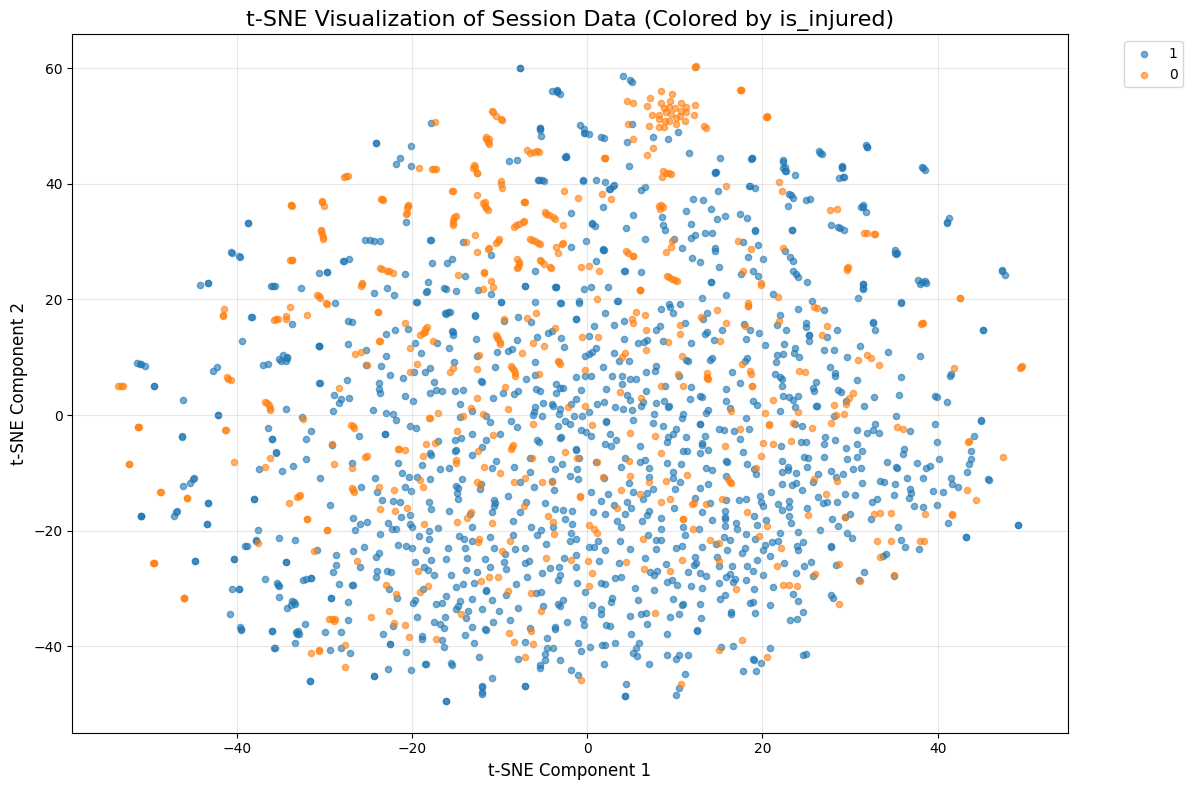

/var/folders/2w/vl1bz9zs2c37dzy7d38b9cbm0000gn/T/ipykernel_34224/3652489221.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


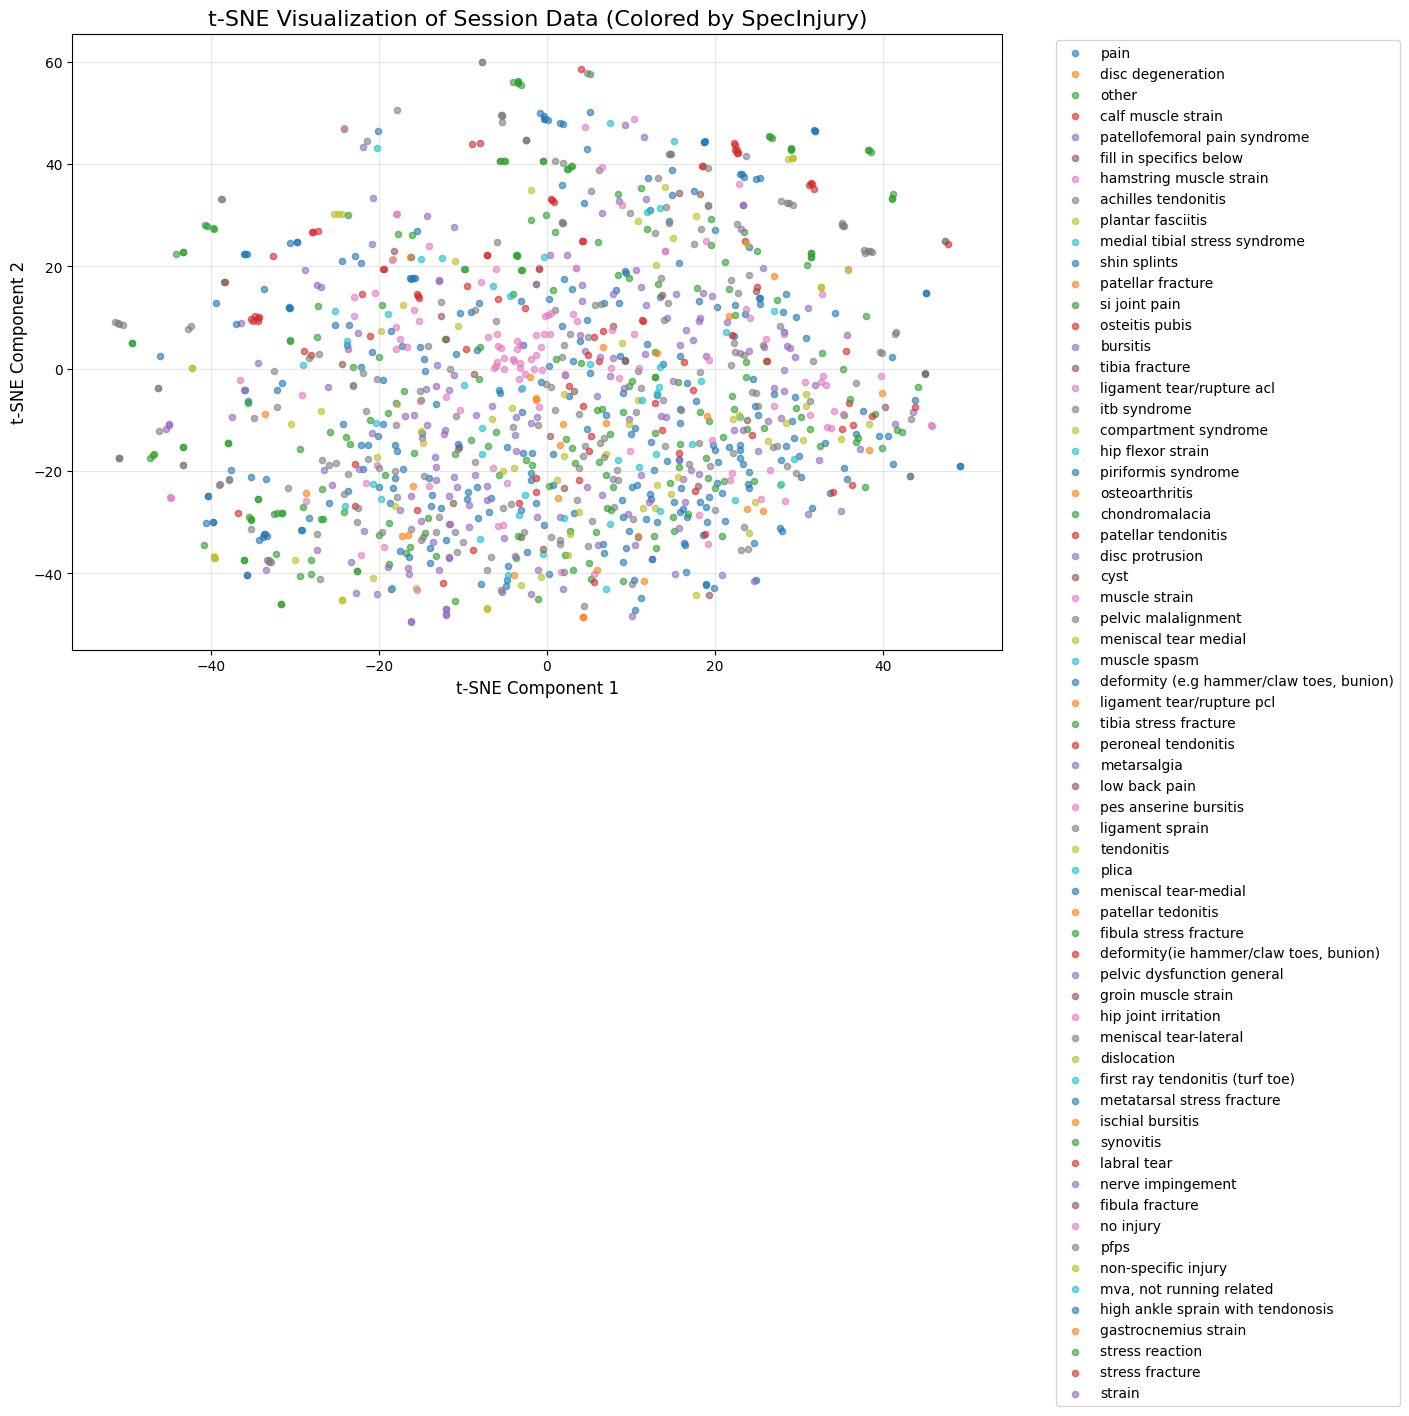

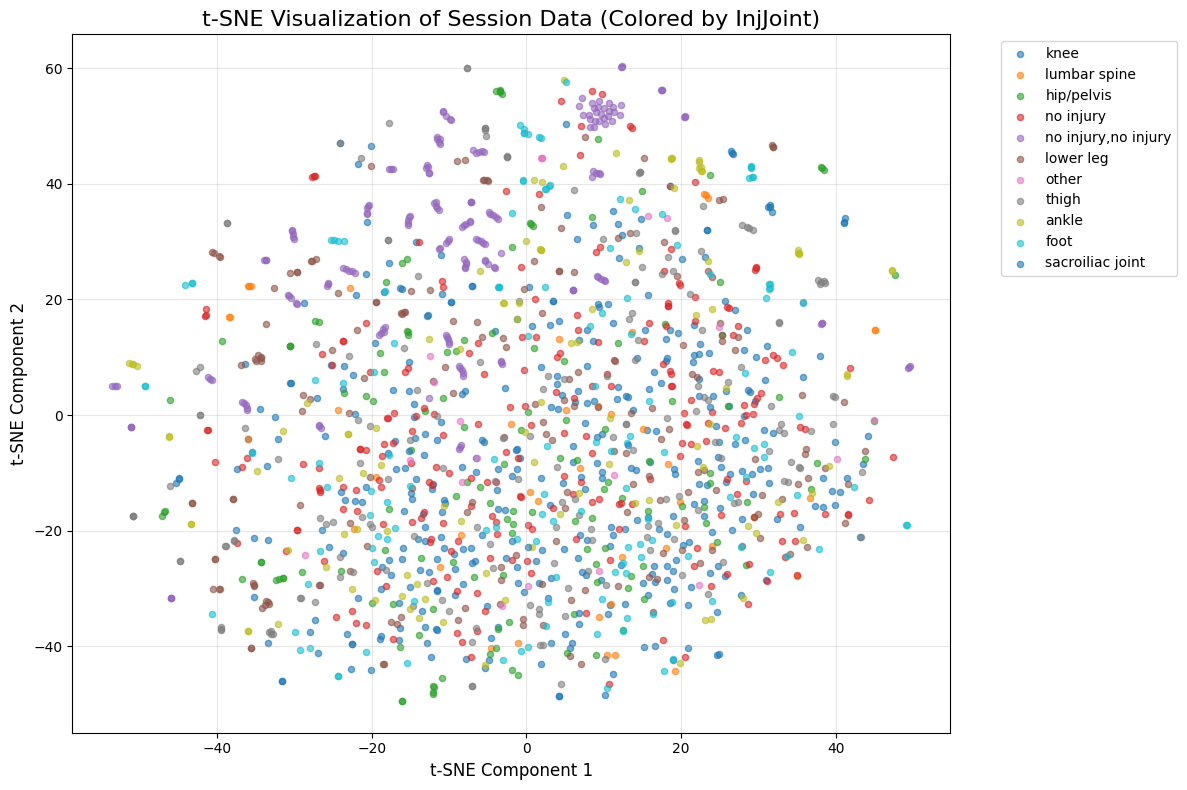

In [24]:
def plot_model_outputs_scatter_by_column(model_output, data, column_name, model_name ,figsize=(12, 8)):
    """
    Create Model Outputs visualization colored by a specific column.
    
    Parameters:
    model_output: Model Outputs array; Expected shape (N,2)
    data: DataFrame containing the column to color by
    column_name: Name of the column to use for coloring
    model_name: Name of the model to use in the label
    figsize: Figure size tuple
    """
    plt.figure(figsize=figsize)
    
    # Get unique values in the column
    unique_values = data[column_name].dropna().unique()
    
    # Create scatter plot for each unique value
    for value in unique_values:
        mask = data[column_name] == value
        plt.scatter(model_output[mask, 0], model_output[mask, 1], alpha=0.6, s=20, label=str(value))
    
    plt.title(f'{model_name} Visualization of Session Data (Colored by {column_name})', fontsize=16)
    plt.xlabel(f'{model_name} Component 1', fontsize=12)
    plt.ylabel(f'{model_name} Component 2', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot visualizations for different columns
columns_to_plot = ['is_injured', 'SpecInjury', 'InjJoint']

for column in columns_to_plot:
    if column in session_data_full.columns:
        plot_model_outputs_scatter_by_column(X_tsne, session_data_full, column, "t-SNE")
    else:
        print(f"Column '{column}' not found in the dataset")


The data does not show any groups.

Let's try with PCA

In [20]:
# Applying`` PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_


array([0.09511958, 0.09060506])

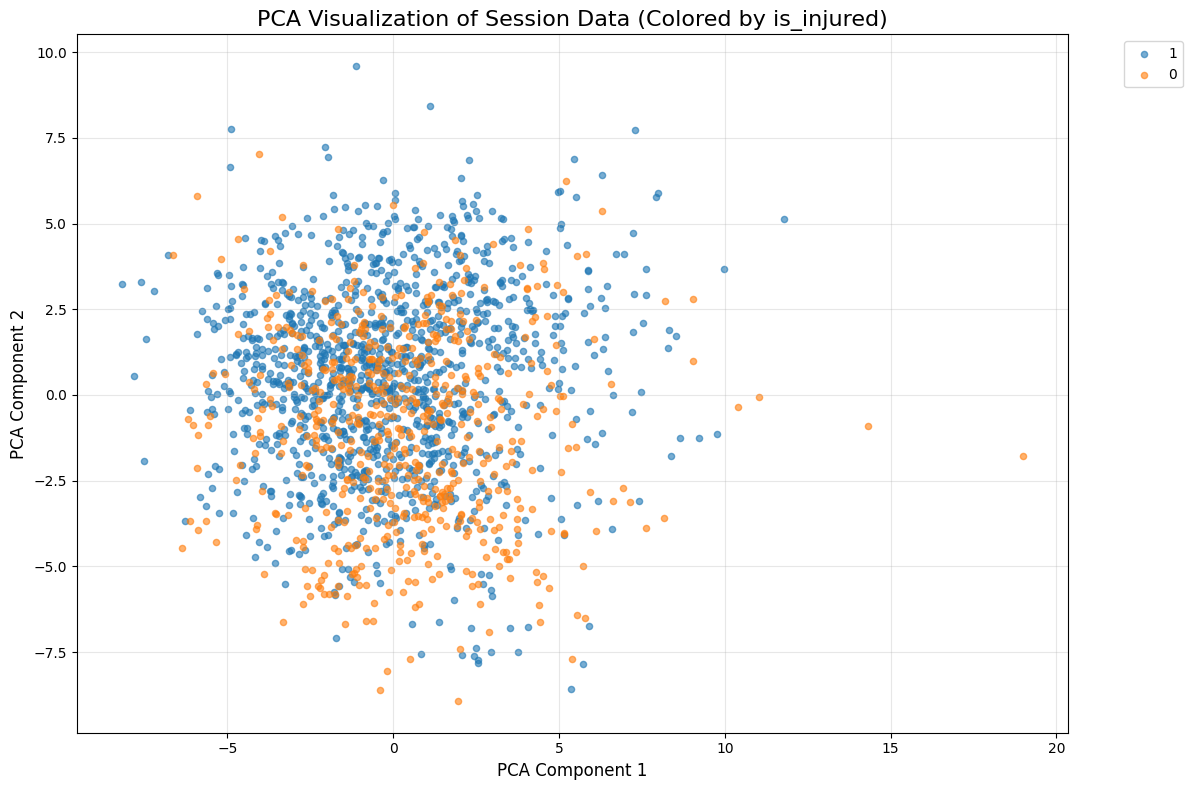

/var/folders/2w/vl1bz9zs2c37dzy7d38b9cbm0000gn/T/ipykernel_34224/3652489221.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


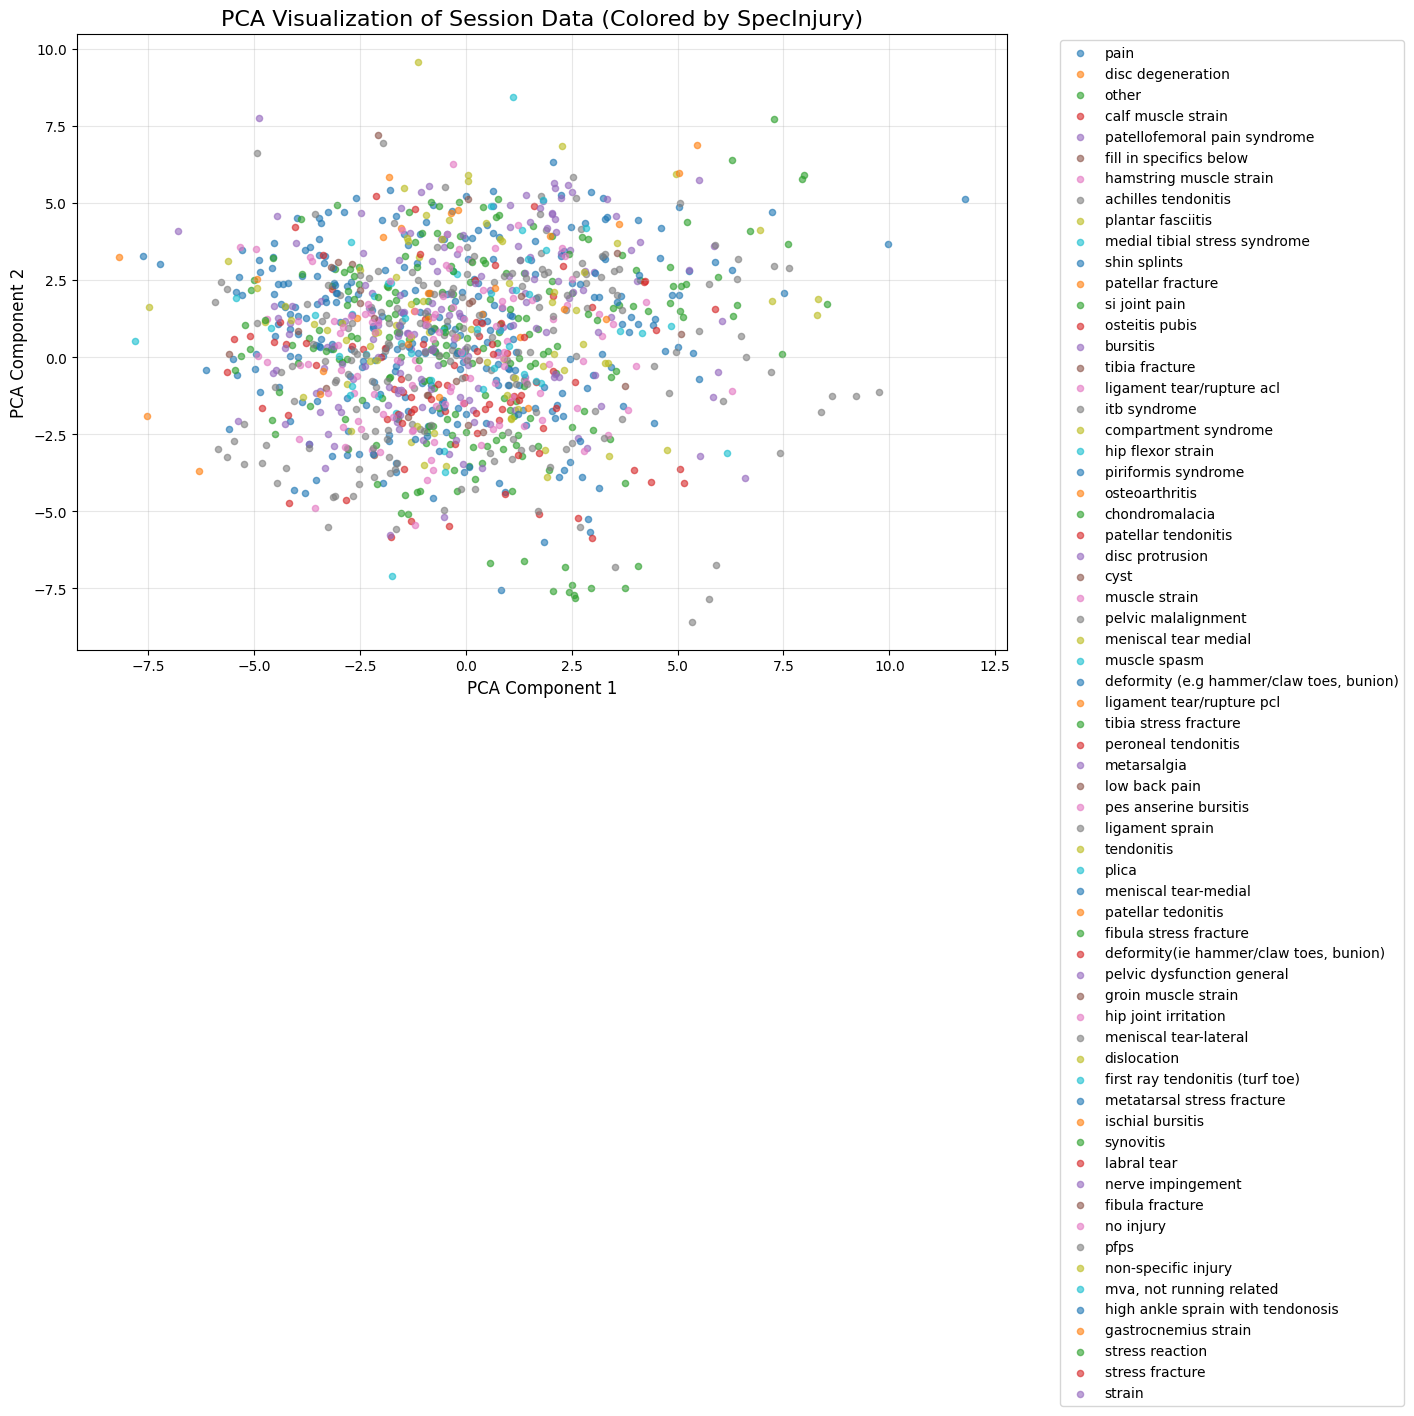

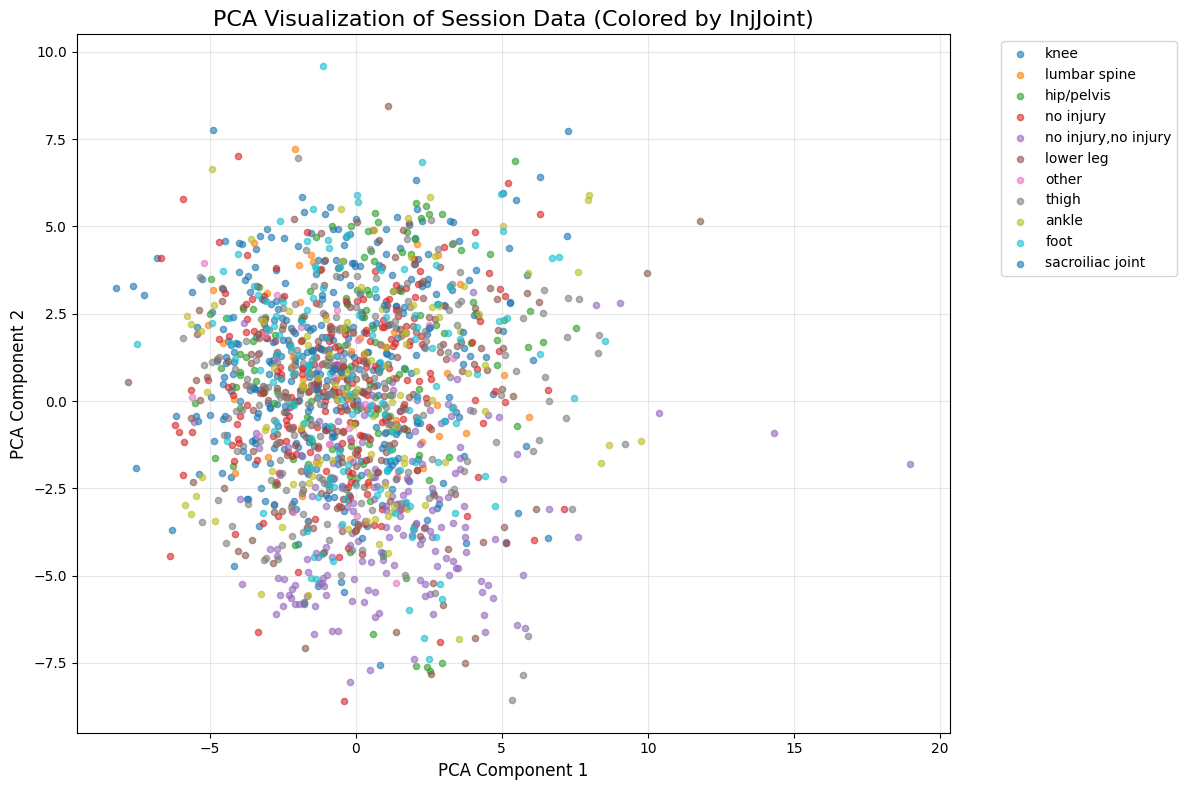

In [25]:
# Plot visualizations for different columns
columns_to_plot = ['is_injured', 'SpecInjury', 'InjJoint']

for column in columns_to_plot:
    if column in session_data_full.columns:
        plot_model_outputs_scatter_by_column(X_pca, session_data_full, column, "PCA")
    else:
        print(f"Column '{column}' not found in the dataset")

Now we are going to look at the correlation between is_injured and the rest of the variables:

Top 10 most positively correlated features with is_injured:
r_stance_time            0.221512
l_stance_time            0.221122
age                      0.199433
r_hip_ext_peak_angle     0.152747
l_ankle_eve_peak_vel     0.150414
l_ankle_eve_excursion    0.149748
r_ankle_eve_peak_vel     0.145723
l_hip_ext_peak_angle     0.130500
l_knee_rot_peak_angle    0.108297
l_foot_ang_at_hs         0.107503
Name: is_injured, dtype: float64

Top 10 most negatively correlated features with is_injured:
l_ankle_df_peak_angle         -0.092139
l_peak_pelvic_drop_velocity   -0.093144
r_knee_add_peak_angle         -0.097865
r_pelvis_drop_excursion       -0.098595
l_hip_rot_peak_angle          -0.117406
r_knee_abd_peak_angle         -0.118341
r_peak_pelvic_drop_velocity   -0.128525
l_stride_length               -0.209884
r_stride_length               -0.209988
speed_r                       -0.220465
Name: is_injured, dtype: float64


/Users/adrianzapaterreig/Documents/Personal/TFM/rickd-analysis/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5405: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)
/Users/adrianzapaterreig/Documents/Personal/TFM/rickd-analysis/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5405: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)
/Users/adrianzapaterreig/Documents/Personal/TFM/rickd-analysis/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5405: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)
/Users/adrianzapaterreig/Documents/Personal/TFM/rickd-analysis/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5405: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearson

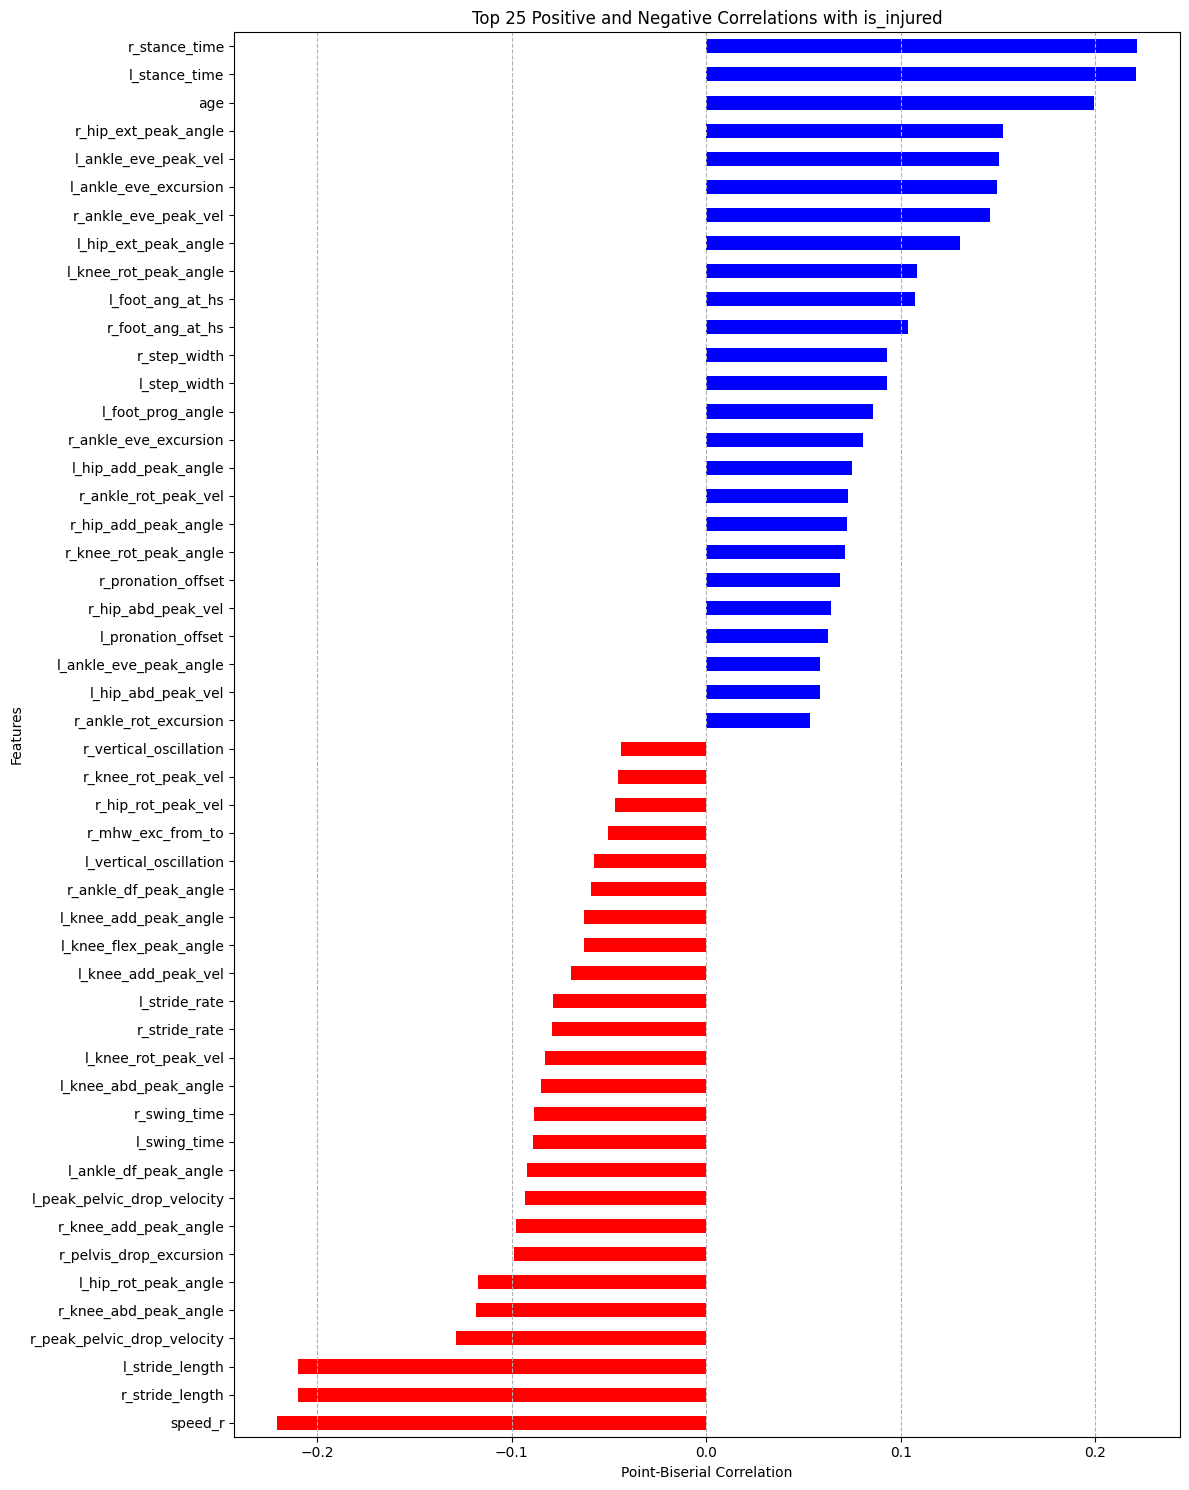

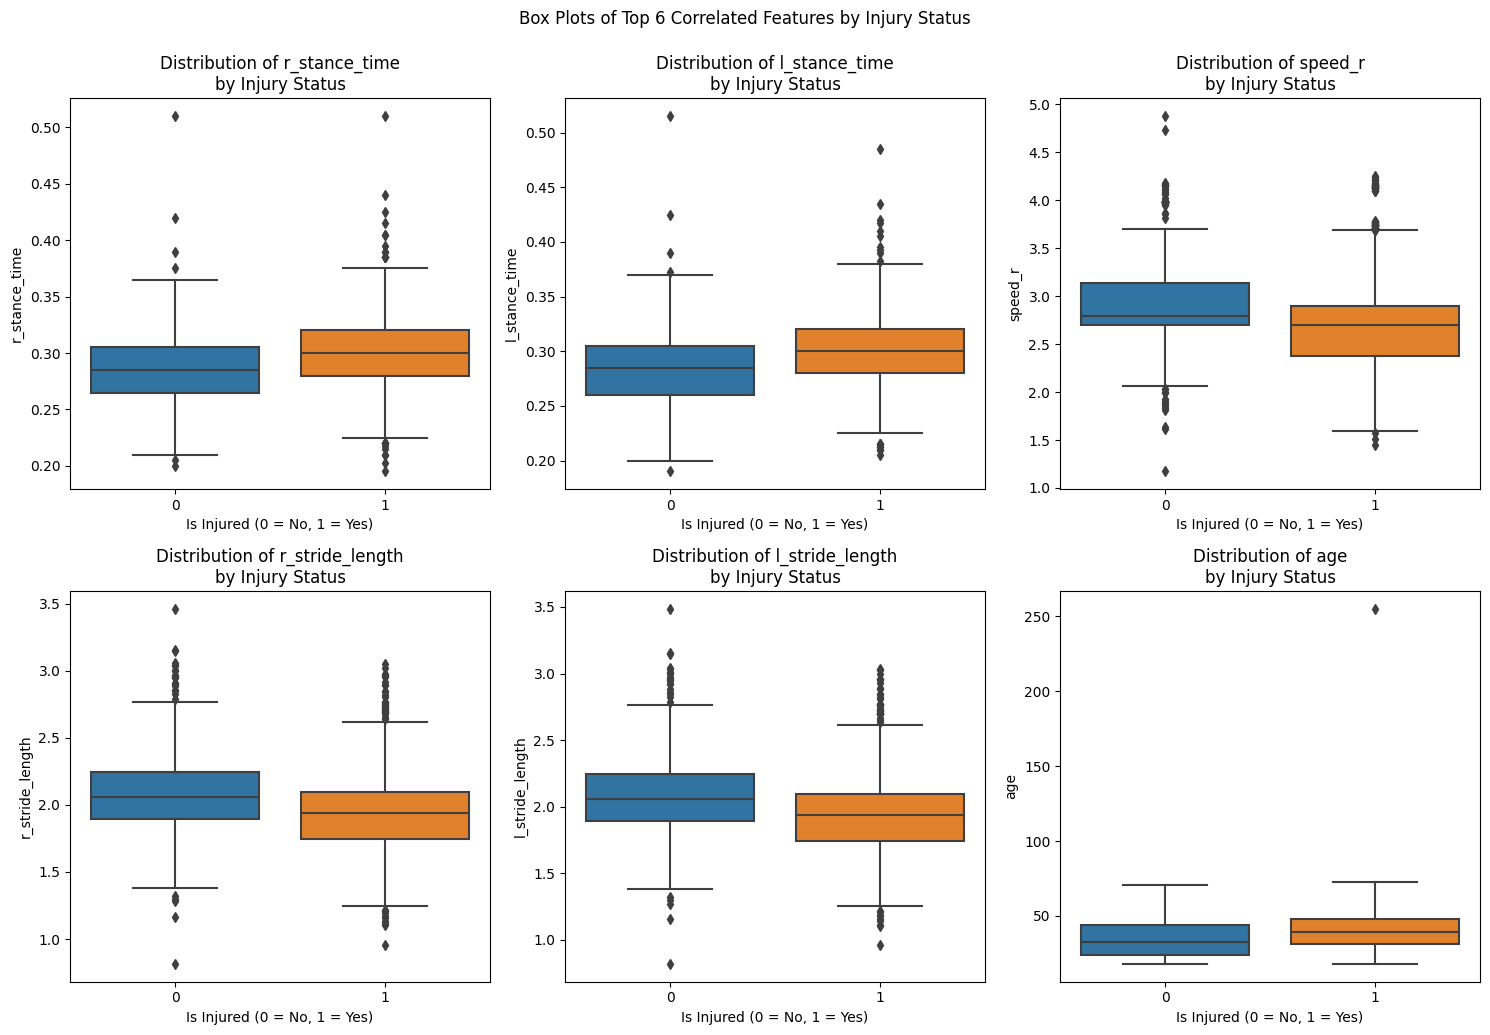

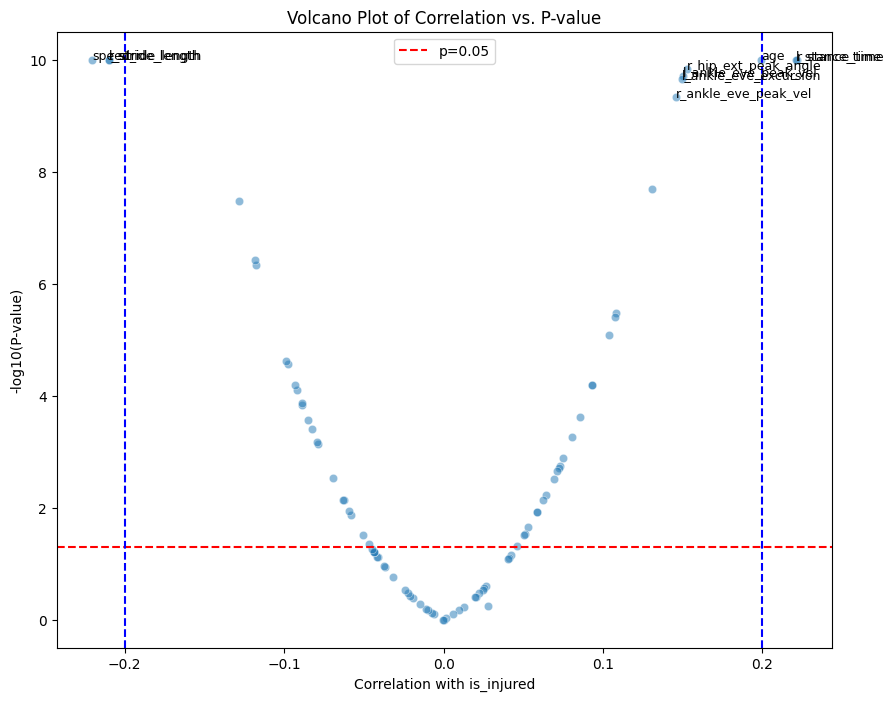


Top 15 features by Mutual Information:
Weight                          0.079253
InjDuration                     0.075699
speed_r                         0.068026
age                             0.059582
Height                          0.046534
r_hip_add_peak_angle            0.036771
l_stance_time                   0.029955
l_mhw_percent_swing             0.026934
l_knee_rot_at_hs                0.026256
l_pelvis_drop_percent_stance    0.026007
r_stance_time                   0.025058
l_knee_abd_peak_angle           0.023982
l_knee_flex_peak_angle          0.023789
l_hip_rot_percent_stance        0.023494
l_hip_rot_peak_vel              0.022942
Name: MI Scores, dtype: float64


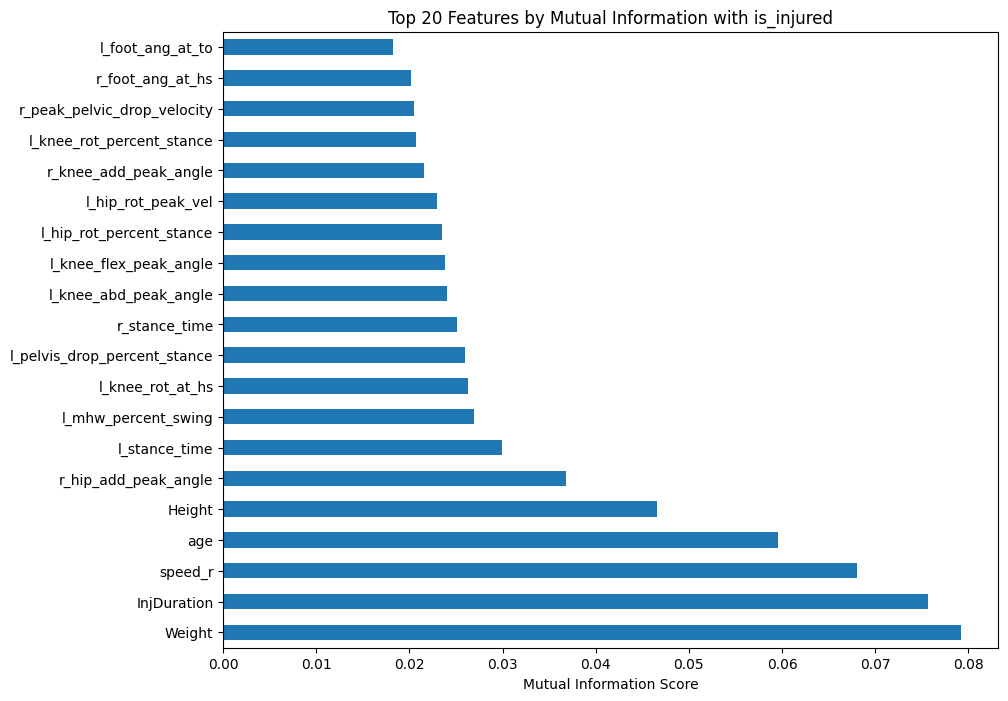


Summary of feature importance (top 20 by absolute correlation):


,Correlation,Abs_Correlation,P_Value,Mutual_Info,Corr_Rank,MI_Rank
r_stance_time,0.221512,0.221512,8.466714e-22,0.025058,1.0,8.0
l_stance_time,0.221122,0.221122,1.001281e-21,0.029955,2.0,7.0
speed_r,-0.220465,0.220465,1.327718e-21,0.068026,3.0,3.0
r_stride_length,-0.209988,0.209988,1.054408e-19,0.003990,4.0,48.0
l_stride_length,-0.209884,0.209884,1.099807e-19,0.010899,5.0,27.0
age,0.199433,0.199433,6.873085e-18,0.059582,6.0,4.0
r_hip_ext_peak_angle,0.152747,0.152747,4.964553e-11,0.000000,7.0,72.0
l_ankle_eve_peak_vel,0.150414,0.150414,9.771349e-11,0.014047,8.0,24.0
l_ankle_eve_excursion,0.149748,0.149748,1.183368e-10,0.008432,9.0,37.0
r_ankle_eve_peak_vel,0.145723,0.145723,3.693658e-10,0.001321,10.0,53.0


In [26]:
# Correlation analysis between features and 'is_injured'

import pandas as pd
from scipy.stats import pointbiserialr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

# Ensure we are using only numerical features from X
# The 'feature_numerical_columns' variable should be available from previous cells
numerical_X = X[feature_numerical_columns].copy()

# Add 'is_injured' from Y to our numerical dataframe for correlation calculation
df_for_corr = numerical_X.copy()
df_for_corr['is_injured'] = Y['is_injured']

# --- 1. Point-biserial correlation ---
# Pandas .corr() calculates pearson correlation. When one variable is dichotomous (like is_injured)
# and the other is continuous, the pearson correlation is equivalent to the point-biserial correlation.
correlations = df_for_corr.corr(numeric_only=True)['is_injured'].dropna().sort_values(ascending=False)

# Remove the self-correlation of is_injured
correlations = correlations.drop('is_injured')

# Calculate p-values for correlations
p_values = {}
for col in numerical_X.columns:
    # pointbiserialr doesn't handle NaNs, so we drop them for the calculation
    valid_data = df_for_corr[[col, 'is_injured']].dropna()
    if valid_data.shape[0] > 1:
        corr, p = pointbiserialr(valid_data[col], valid_data['is_injured'])
        p_values[col] = p
p_values = pd.Series(p_values)


print("Top 10 most positively correlated features with is_injured:")
print(correlations.head(10))
print("\nTop 10 most negatively correlated features with is_injured:")
print(correlations.tail(10))

# --- 2. Horizontal Bar Plot of Correlations ---
top_25_corr = pd.concat([correlations.head(25), correlations.tail(25)]).sort_values()
plt.figure(figsize=(12, 15))
colors = ['red' if c < 0 else 'blue' for c in top_25_corr.values]
top_25_corr.plot(kind='barh', color=colors)
plt.title('Top 25 Positive and Negative Correlations with is_injured')
plt.xlabel('Point-Biserial Correlation')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

# --- 3. Box plots for top correlated features ---
top_6_features = correlations.abs().nlargest(6).index

plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_6_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='is_injured', y=feature, data=df_for_corr)
    plt.title(f'Distribution of {feature}\nby Injury Status')
    plt.xlabel('Is Injured (0 = No, 1 = Yes)')
    plt.ylabel(feature)
plt.tight_layout()
plt.suptitle('Box Plots of Top 6 Correlated Features by Injury Status', y=1.03)
plt.show()

# --- 4. Volcano Plot ---
volcano_data = pd.DataFrame({'correlation': correlations, 'p_value': p_values.reindex(correlations.index)}).dropna()
volcano_data['-log10_p_value'] = -np.log10(volcano_data['p_value'] + 1e-10) # Add small constant to avoid log(0)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='correlation', y='-log10_p_value', data=volcano_data, alpha=0.5)
plt.axhline(-np.log10(0.05), color='r', linestyle='--', label='p=0.05')
plt.axvline(0.2, color='b', linestyle='--')
plt.axvline(-0.2, color='b', linestyle='--')
plt.title('Volcano Plot of Correlation vs. P-value')
plt.xlabel('Correlation with is_injured')
plt.ylabel('-log10(P-value)')
plt.legend()
# Label some points
significant_features = volcano_data[volcano_data['p_value'] < 0.05].nlargest(10, '-log10_p_value')
for i, row in significant_features.iterrows():
    plt.text(row['correlation'], row['-log10_p_value'], i, fontsize=9)
plt.show()

# --- 5. Mutual Information ---
# This can capture non-linear relationships.
# We need to handle NaNs for mutual_info_classif by imputing
numerical_X_imputed = numerical_X.fillna(numerical_X.median())
mi_scores = mutual_info_classif(numerical_X_imputed, Y['is_injured'])
mi_scores = pd.Series(mi_scores, name="MI Scores", index=numerical_X_imputed.columns)
mi_scores = mi_scores.sort_values(ascending=False)

print("\nTop 15 features by Mutual Information:")
print(mi_scores.head(15))

plt.figure(figsize=(10, 8))
mi_scores.head(20).plot(kind='barh')
plt.title('Top 20 Features by Mutual Information with is_injured')
plt.xlabel('Mutual Information Score')
plt.show()

# --- 6. Summary Table ---
summary_df = pd.DataFrame({
    'Correlation': correlations,
    'Abs_Correlation': correlations.abs(),
    'P_Value': p_values,
    'Mutual_Info': mi_scores
}).sort_values('Abs_Correlation', ascending=False).dropna(subset=['Correlation', 'P_Value', 'Mutual_Info'])

summary_df['Corr_Rank'] = summary_df['Abs_Correlation'].rank(ascending=False)
summary_df['MI_Rank'] = summary_df['Mutual_Info'].rank(ascending=False)

print("\nSummary of feature importance (top 20 by absolute correlation):")
from IPython.display import display
with pd.option_context('display.max_rows', 25):
    display(summary_df.head(20))


In [27]:
# --- Multicollinearity Analysis ---

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from IPython.display import display

# Use the numerical features identified previously and impute missing values
# 'feature_numerical_columns' should be available from a previous cell.
numerical_X = X[feature_numerical_columns].copy()
numerical_X_imputed = numerical_X.fillna(numerical_X.median())

# --- 1. High Correlation Pairs ---
# With many features, a full heatmap is unreadable. Instead, let's list pairs with high correlation.
print("Finding highly correlated feature pairs...")
corr_matrix = numerical_X_imputed.corr().abs()

# Select upper triangle of correlation matrix to avoid duplicate pairs
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs with correlation greater than 0.8
high_corr_pairs = upper.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > 0.8].sort_values(by='Correlation', ascending=False)

print("\nPairs of features with absolute correlation > 0.8:")
with pd.option_context('display.max_rows', 20):
    display(high_corr_pairs)

# --- 2. Variance Inflation Factor (VIF) ---
# VIF measures how much the variance of an estimated regression coefficient is increased because of multicollinearity.
# A VIF > 10 is often considered a sign of high multicollinearity.
# Note: This can be computationally intensive for many features.

# For VIF calculation, we need to add a constant (intercept) to our data
X_for_vif = sm.add_constant(numerical_X_imputed)

print("\nCalculating VIF... (this may take a moment)")

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_for_vif.values, i) for i in range(len(X_for_vif.columns))]

# Remove the VIF of the constant, which is not a feature
vif_data = vif_data[vif_data['feature'] != 'const'].sort_values('VIF', ascending=False)

print("\nTop 20 Features by VIF:")
with pd.option_context('display.max_rows', 20):
    display(vif_data.head(20))

print(f"\n{len(vif_data[vif_data['VIF'] > 10])} features have VIF > 10 (High Multicollinearity).")
print(f"{len(vif_data[(vif_data['VIF'] > 5) & (vif_data['VIF'] <= 10)])} features have VIF between 5 and 10 (Moderate Multicollinearity).")

Finding highly correlated feature pairs...

Pairs of features with absolute correlation > 0.8:


,Feature 1,Feature 2,Correlation
410,l_step_width,r_step_width,1.000000
720,l_stride_length,r_stride_length,0.999814
567,l_stride_rate,r_stride_rate,0.998800
869,l_swing_time,r_swing_time,0.937379
9,speed_r,r_stride_length,0.930643
8,speed_r,l_stride_length,0.930306
3192,l_foot_ang_at_hs,r_foot_ang_at_hs,0.908562
1014,l_stance_time,r_stance_time,0.908525
2790,l_hip_ext_peak_angle,r_hip_ext_peak_angle,0.883064
3569,l_vertical_oscillation,r_vertical_oscillation,0.862028



Calculating VIF... (this may take a moment)


/Users/adrianzapaterreig/Documents/Personal/TFM/rickd-analysis/.venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/adrianzapaterreig/Documents/Personal/TFM/rickd-analysis/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss



Top 20 Features by VIF:


,feature,VIF
6,l_step_width,inf
7,r_step_width,inf
11,r_stride_length,7.701356e+04
10,l_stride_length,7.699168e+04
8,l_stride_rate,1.212911e+04
9,r_stride_rate,1.200771e+04
64,l_knee_abd_peak_angle,9.229098e+02
56,l_knee_add_peak_angle,8.178071e+02
65,r_knee_abd_peak_angle,8.107258e+02
57,r_knee_add_peak_angle,5.877654e+02



33 features have VIF > 10 (High Multicollinearity).
19 features have VIF between 5 and 10 (Moderate Multicollinearity).
